Objective: The goal of this code is to perform anomaly detection on a dataset (catfish.csv) using PyOD, a Python library specifically designed for detecting outliers in multivariate data. The code demonstrates the use of different anomaly detection models from PyOD (KNN, Isolation Forest, and AutoEncoder).

In [ ]:
!pip install pyod



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=23e7d87ae4d74c4b62ec97bce4188911124d17bd0483a1ccf3d5be73420e531d
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [ ]:
import numpy as np
from pyod.models.iforest import IForest  # Isolation Forest
from pyod.utils.data import generate_data  # Generate synthetic data
from pyod.utils.data import evaluate_print  # Evaluate model performance
from pyod.utils.example import visualize  # Visualize results

Import necessary libraries for data manipulation (pandas, numpy), visualization (matplotlib), and anomaly detection (pyod.models).
StandardScaler is used to standardize the features (important for distance-based models like KNN).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.knn import KNN  # You can also use other models like AutoEncoder or IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
df = pd.read_csv('catfish.csv')

# Check the first few rows to understand the structure
print(df.head())

        Date  Total
0  1986-1-01   9034
1  1986-2-01   9596
2  1986-3-01  10558
3  1986-4-01   9002
4  1986-5-01   9239


In [ ]:
# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Use the 'Total' column for anomaly detection
X = df[['Total']].values  # Convert to a 2D array suitable for PyOD

In [ ]:
# Standardize the data (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

KNN Model: A K-Nearest Neighbors model is initialized and fitted to the standardized data. The KNN algorithm identifies anomalies based on the proximity of each data point to its neighbors.
decision_function: This function returns the anomaly score for each data point, indicating how much of an anomaly it is.
predict: This predicts the anomaly labels (1 for anomaly, 0 for normal) based on the model.
The prediction (y_test_pred) is added as a new column ('Anomaly') to the DataFrame for easy visualization.

In [ ]:
# Initialize the KNN model from PyOD
model = KNN()

# Fit the model to the data
model.fit(X_scaled)

# Get the anomaly scores
y_test_scores = model.decision_function(X_scaled)

# Predict anomalies (1 means an anomaly, 0 means normal)
y_test_pred = model.predict(X_scaled)

# Add the prediction to the DataFrame for easy visualization
df['Anomaly'] = y_test_pred

This block plots the 'Total' values over time, with anomalies highlighted in red.
Anomalies are detected by checking where y_test_pred == 1. The anomalies are plotted as red points on the graph, while the normal values are shown in blue.
The plot also includes labels for the axes, title, and legend, and it rotates the x-axis labels for better readability.

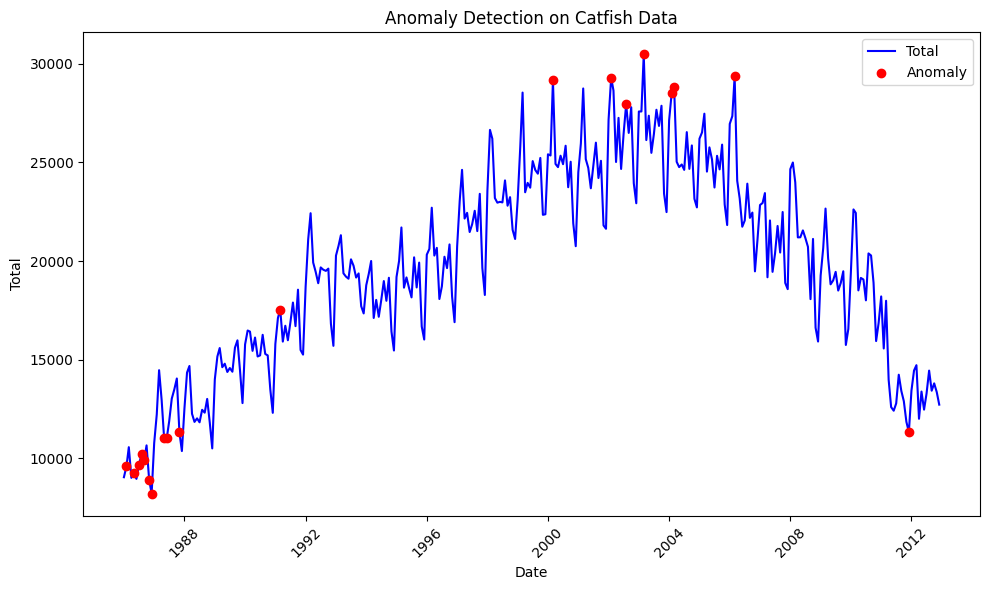

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot the Total values
plt.plot(df['Date'], df['Total'], label='Total', color='blue')

# Highlight anomalies (where y_test_pred == 1)
anomalies = df[df['Anomaly'] == 1]
plt.scatter(anomalies['Date'], anomalies['Total'], color='red', label='Anomaly', zorder=5)

plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Anomaly Detection on Catfish Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


AutoEncoder Model: An AutoEncoder model is an unsupervised neural network that learns to encode and decode the input data. It identifies anomalies by looking for points that cannot be well-reconstructed by the network (which are likely outliers).
The model is trained and anomalies are predicted, similar to the other models.

In [ ]:
from pyod.models.iforest import IForest

model = IForest()
model.fit(X_scaled)
y_test_pred = model.predict(X_scaled)

In [ ]:
from pyod.models.auto_encoder import AutoEncoder

model = AutoEncoder()
model.fit(X_scaled)
y_test_pred = model.predict(X_scaled)

Training: 100%|██████████| 10/10 [00:00<00:00, 15.94it/s]


Summary
Data Preparation: The dataset is loaded, the 'Total' column is selected, and the data is standardized to make it suitable for anomaly detection algorithms.
Modeling: Three different anomaly detection algorithms are used in the code: KNN, Isolation Forest, and AutoEncoder.
KNN detects anomalies by considering the distance between points and their neighbors.
Isolation Forest isolates anomalies by randomly partitioning the data.
AutoEncoder detects anomalies based on reconstruction error, where points with high error are considered anomalies.
Visualization: Anomalies are plotted in red on a time-series graph to visually inspect how well the models perform.
Comparison: The models are run one after the other, but there is no explicit comparison or performance evaluation in this code. To fully evaluate the models, metrics like accuracy, precision, recall, or the area under the ROC curve could be used.
